# DataBase Linear regression Rodríguez-Pérez, Q. et.al.2018(SRL-Under-Review) 

In [2]:
ENV["LINES"]=1000

1000

In [1]:
using DataFrames
using GLM
using Plots
using CSV
using StatPlots

In [39]:
using LaTeXStrings

In [30]:
pyplot()

Plots.PyPlotBackend()

In [4]:
DataGolfo = CSV.read("BMPF-14junio2017GolfoNEW.csv");
DataSUB = CSV.read("BMPF-14junio2017SUBNEW.csv");
DataTMVB = CSV.read("BMPF-14junio2017TMVBNEW.csv");

In [6]:
display(DataGolfo)
display(DataSUB)
display(DataTMVB)

,Event,Date_dd/mm/aa,Time_hh:mm:ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,5,11/03/78,05:18:04.40,-115.03,32.27,14.4,3.7,3.85E+14,61.57,7.24,0.134,0.2275,missing,missing,missing,missing,missing,Gcal,missing,Good,B,10.38,0.0092,0.4455,missing
2,6,11/03/78,05:40:30.40,-115.09,32.25,14.9,4.3,2.50E+15,37.59,2.4,0.308,0.2796,missing,missing,missing,missing,missing,Gcal,missing,Good,B,5.014,0.087,0.8962,missing
3,7,11/03/78,23:57:45.90,-115.11,32.24,0.0,4.7,1.09E+16,120.16,3.16,0.341,0.9946,missing,missing,missing,missing,missing,Gcal,missing,Good,B,61.49,0.0559,0.4596,missing
4,8,12/03/78,00:30:17.20,-115.09,32.32,12.5,4.7,9.52E+15,78.88,2.34,0.375,0.7183,missing,missing,missing,missing,missing,Gcal,missing,Good,B,19.9333,0.0488,0.2263,missing
5,9,13/03/78,09:11:37.20,-115.1,32.31,13.2,4.0,1.12E+15,89.35,5.2,0.18,0.3836,missing,missing,missing,missing,missing,Gcal,missing,Good,B,2.0506,0.0057,0.1768,missing
6,10,15/03/78,12:56:23.40,-115.15,32.33,0.0,2.4,3.50E+12,0.06,3.72,0.3,0.0004,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.0141,0.0587,0.6364,missing
7,11,15/03/78,16:17:16.90,-115.11,32.32,0.0,2.9,2.22E+13,0.42,3.55,0.29,0.0029,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.0707,0.0184,0.2192,missing
8,12,15/03/78,20:13:17.60,-115.09,32.34,9.3,3.3,8.57E+13,21.65,9.55,0.12,0.0631,missing,missing,missing,missing,missing,Gcal,missing,Good,B,3.9509,0.0192,1.2783,missing
9,13,16/03/78,01:51:09.80,-115.08,32.34,10.5,3.8,4.42E+14,36.78,6.61,0.17,0.1549,missing,missing,missing,missing,missing,Gcal,missing,Good,B,6.5784,0.0361,1.0748,missing
10,14,17/03/78,02:42:12.30,-115.12,32.31,14.0,2.8,1.39E+13,0.84,5.75,0.19,0.004,missing,missing,missing,missing,missing,Gcal,missing,Good,B,0.2404,0.0417,1.0465,missing


,Event,Date_dd_mm_aa,Time_hh_mm_ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,1,28/08/73,09:50:39.12,-96.6,18.3,80.0,7.1,4.8e19,9.6,0.1,13.0,1.33,missing,missing,missing,missing,missing,Ver,missing,Good,C,missing,missing,missing,missing
2,26,05/12/78,06:32:26.00,-97.2867,15.6912,20.92,4.8,8.3e16,10.0,0.87,1.54,0.3728,7.13e10,8.59036e-7,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
3,27,05/12/78,13:01:30.00,-96.7983,15.6198,18.15,4.0,1.26e15,40.0,5.59,0.24,0.2325,7.01e9,5.56835e-6,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
4,28,05/12/78,23:41:33.00,-96.7743,15.6542,16.61,4.4,2.2e16,5.0,1.08,1.24,0.1508,4.9e10,2.22727e-6,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
5,29,06/12/78,02:24:24.00,-96.4485,15.5745,13.69,3.5,2.24e14,20.0,7.89,0.17,0.0824,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
6,30,06/12/78,06:47:46.00,-96.7843,16.034,28.05,3.4,1.58e14,40.0,11.17,0.12,0.1164,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
7,31,07/12/78,04:22:05.00,-96.9297,15.7507,16.59,3.5,2.24e14,7.0,5.56,0.24,0.0409,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
8,32,07/12/78,07:00:00.00,-96.862,15.9655,0.0,3.5,1.5e14,100.0,15.43,0.09,0.2108,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
9,33,07/12/78,23:52:00.00,-96.836,16.0757,27.78,3.7,4.47e14,30.0,7.18,0.19,0.1359,missing,missing,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing
10,34,08/12/78,00:27:11.00,-96.8098,16.0417,33.77,3.6,3.16e14,40.0,8.87,0.15,0.1467,7.55e9,2.38773e-5,missing,missing,missing,oax,missing,Good,C,missing,missing,missing,missing


,Event,Date_dd/mm/aa,Time_hh:mm:ss,Lon,Lat,Depth_km,Mw,Mo_Nm,Stress_Drop_MPa,Fc_Hz,Radius_km,Displacement_m,Er_J,Er_Mo,Strike,Dip,Rake,Place,None,Quality1,Quality2,Drop_Sd,Raduis_Sd,Fc_Sd,Er_Sd
1,2,12/07/74,02:41:52.50,-99.2,19.21,7.0,3.8,5.34e14,53.3,5.47,0.16,0.2212,missing,missing,missing,missing,missing,TMVB,missing,Fair,B,missing,missing,missing,missing
2,3,25/03/76,23:05:00.50,-99.33,20.4807,4.0,5.0,4.5e16,0.7,0.4,3.0,0.0531,missing,missing,242,64,-174,TMVB,missing,Good,B,missing,missing,missing,missing
3,4,04/10/76,06:59:16.41,-99.1458,20.4927,4.0,5.1,5.6e16,0.7,0.45,3.0,0.066,missing,missing,291,76,-25,TMVB,missing,Good,B,missing,missing,missing,missing
4,42,22/02/79,09:16:33,-100.176,19.8936,8.19,5.5,1.75e17,8.236,0.635,2.02,0.4551,missing,missing,280,66,-48,TMVB,T,Good,B,2.6,0.33941,0.10607,missing
5,43,22/02/79,10:38:00,-100.191,19.9166,8.53,3.6,2.69e14,0.56,1.96,0.701,0.0058,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.57,0.16,0.78,missing
6,44,22/02/79,09:57:00,-100.202,19.8738,4.96,3.4,1.38e14,0.06,1.26,1.005,0.0014,missing,missing,missing,missing,missing,TMVB,T,Fair,B,missing,missing,missing,missing
7,45,22/02/79,10:26:00,-100.177,19.8531,7.86,3.1,4.9e13,0.116,2.21,0.62,0.0014,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.087681,0.24,0.86267,missing
8,46,22/02/79,10:28:00,-100.135,19.8287,3.32,3.3,7.9e13,0.518,2.5,0.79,0.0013,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.70661,0.67175,2.1213,missing
9,47,22/02/79,12:15:00,-100.147,19.8853,9.72,3.3,9.02e13,0.613,3.16,0.4,0.006,missing,missing,missing,missing,missing,TMVB,T,Good,B,missing,missing,missing,missing
10,48,22/02/79,19:45:00,-100.171,19.8352,4.96,3.9,7.95e14,0.405,1.17,1.12,0.0067,missing,missing,missing,missing,missing,TMVB,T,Good,B,0.38857,0.25796,0.31213,missing


In [6]:
DataGolfo[:Mw]=round.(collect(skipmissing(DataGolfo[:Mw])),1);
DataSUB[:Mw]=round.(collect(skipmissing(DataSUB[:Mw])),1);
DataTMVB[:Mw]=round.(collect(skipmissing(DataTMVB[:Mw])),1);

In [7]:
SUB = DataSUB[find(.~ismissing.(DataSUB[:,:Fc_Hz])), :]; # Remove and Fc -->> NA
TMVB = DataTMVB[find(.~ismissing.(DataTMVB[:,:Fc_Hz])),:]; # # Remove Fc -->> NA

# 1. Subduction Catalog

In [62]:
# Magnitude Filter
SUBMw = SUB[(SUB[:Mw]) .>=3.6,:]; #Mw >= 3.6
SUBMw1 = SUB[(SUB[:Mw]) .<3.6,:]; #Mw < 3.6

In [28]:
sub = "MSZ";
golf = "GBC";
TM = "TMVB";

In [63]:
ReMwFc = fit(LinearModel,@formula(Fc_Hz ~ Mw),SUBMw) # Mw 3.6

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Fc_Hz ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   10.9871  0.588023  18.6848   <1e-41
Mw            -1.7541  0.119559 -14.6714   <1e-30


In [ ]:
fMwfc(x)=coef(ReMwFc)[2] * x + coef(ReMwFc)[1];
#x = collect(1:8);
xMsf = SUBMw[:Mw];
corrMsf = fMwfc(xMsf);
#σ = coef(ReMwFc)[2];

In [67]:
ReMwFc1 = fit(LinearModel,@formula(Fc_Hz ~ Mw),SUBMw1) # Mw < 3.6

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Fc_Hz ~ 1 + Mw

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   5.10607  0.857235 5.95645    <1e-8
Mw           0.395732   0.32858 1.20437   0.2295


In [66]:
coef(ReMwFc1)[1]

5.106074254503051

In [76]:
fMwfc1(x)=coef(ReMwFc1)[2] * x + coef(ReMwFc1)[1];
#x = collect(1:8);
xMsf1 = SUBMw1[:Mw];
corrMsf1 = fMwfc1(xMsf1);
#σ = coef(ReMwFc)[2];

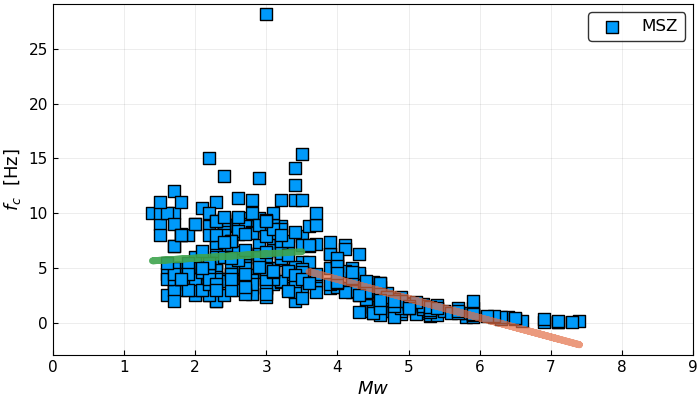

In [154]:
scatter((SUB[:Mw]),(SUB[:Fc_Hz]),m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xMsf,corrMsf,linewidth=5,linealpha=0.7,lab="")
plot!(xMsf1,corrMsf1,linewidth=5,linealpha=0.9,lab="")
#plot!([corr corr],fillrange=[corr+σ,corr-σ],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-RegressSUB.pdf",dpi=400)

In [70]:
SUB[:LogRa] = log10.(collect(skipmissing(SUB[:Radius_km])));
SUBMw2 = SUB[(SUB[:Mw]) .>=3.6,:]; #Mw >= 3.6
SUBMw3 = SUB[(SUB[:Mw]) .<3.6,:]; #Mw < 3.6


In [71]:
ReMwRad = fit(LinearModel,@formula(LogRa ~ Mw),SUBMw2)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Mw

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)   -2.2393 0.0806025 -27.782   <1e-62
Mw           0.449385 0.0163884 27.4208   <1e-62


In [72]:
fMwRa(x)=coef(ReMwRad)[2] * x + coef(ReMwRad)[1];
xRsub = SUBMw2[:Mw];
rcorrRsub = fMwRa(xRsub);

In [73]:
ReMwRad3 = fit(LinearModel,@formula(LogRa ~ Mw),SUBMw3)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Mw

Coefficients:
                Estimate Std.Error   t value Pr(>|t|)
(Intercept)    -0.539646 0.0587454  -9.18618   <1e-16
Mw           -0.00776479 0.0225172 -0.344838   0.7305


In [81]:
fMwRa3(x)=coef(ReMwRad3)[2] * x + coef(ReMwRad3)[1];
xRsub3 = SUBMw3[:Mw];
rcorrRsub3 = fMwRa3(xRsub3);

In [156]:
scatter((SUB[:Mw]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRsub,rcorrRsub,linewidth=5,linealpha=0.7,lab="")
plot!(xRsub3,rcorrRsub3,linewidth=5,linealpha=0.9,lab="")
#plot!([rcorr rcorr],fillrange=[rcorr+σr,rcorr-σr],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsR-RegressSUB.pdf",dpi=400)

In [84]:
SUB2 = SUB[(SUB[:Displacement_m]) .> 0,:]; # Remove Despla <  0
SUB2[:LogD] = log10.(collect(skipmissing(SUB2[:Displacement_m])));

SUBMw4 = SUB2[(SUB2[:Mw]) .>=3.6,:]; #Mw >= 3.6
SUBMw5 = SUB2[(SUB2[:Mw]) .<3.6,:]; #Mw < 3.6
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

In [85]:
ReMwD = fit(LinearModel,@formula(LogD ~ Mw),SUBMw4)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   -3.4049   0.16039 -21.2288   <1e-48
Mw           0.569532 0.0326113  17.4643   <1e-38


In [86]:
fMwD(x)=coef(ReMwD)[2] * x + coef(ReMwD)[1];
xDsub = SUBMw4[:Mw];
dcorrDsub = fMwD(xDsub);

In [87]:
ReMwD2 = fit(LinearModel,@formula(LogD ~ Mw),SUBMw5)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -6.65408  0.126902 -52.4349   <1e-99
Mw            1.44841 0.0476351  30.4064   <1e-85


In [88]:
fMwD2(x)=coef(ReMwD2)[2] * x + coef(ReMwD2)[1];
xDsub2 = SUBMw5[:Mw];
dcorrDsub2 = fMwD2(xDsub2);

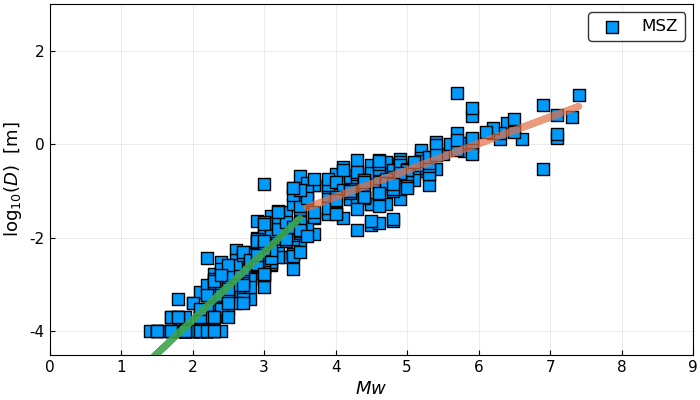

In [159]:
scatter((SUB2[:Mw]),(SUB2[:LogD]), m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,9),xticks=(0:1:9),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDsub,dcorrDsub,linewidth=5,linealpha=0.7,lab="")
plot!(xDsub2,dcorrDsub2,linewidth=5,linealpha=0.9,lab="")
#plot!([dcorr dcorr],fillrange=[dcorr+σd,dcorr-σd],fillalpha=0.3,c=:orange,leg=false)
#PyPlot.savefig("MwvsDRegressSUB.pdf",dpi=400)

# 2. Golfo Catalog

In [90]:
golfoMw = DataGolfo[(DataGolfo[:Mw]) .>=2.14,:]; #Mw >= 2.14
golfoMw2 = DataGolfo[(DataGolfo[:Mw]) .<2.14,:]; #Mw < 2.14

In [91]:
ReGolMwFc = lm(@formula(Fc_Hz ~ Mw),golfoMw)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Fc_Hz ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   10.8785  0.779078  13.9633   <1e-21
Mw           -1.90672  0.223403 -8.53488   <1e-11


In [92]:
GolfMwfc(x)=coef(ReGolMwFc)[2] * x + coef(ReGolMwFc)[1];
xFGo = golfoMw[:Mw];
GolcorrF = GolfMwfc(xFGo);

In [93]:
ReGolMwFc2 = lm(@formula(Fc_Hz ~ Mw),golfoMw2)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Fc_Hz ~ 1 + Mw

Coefficients:
              Estimate Std.Error   t value Pr(>|t|)
(Intercept)     12.079   0.51629   23.3959   <1e-67
Mw           -0.411094   0.49569 -0.829338   0.4076


In [94]:
GolfMwfc2(x)=coef(ReGolMwFc2)[2] * x + coef(ReGolMwFc2)[1];
xFGo2 = golfoMw2[:Mw];
GolcorrF2 = GolfMwfc2(xFGo2);

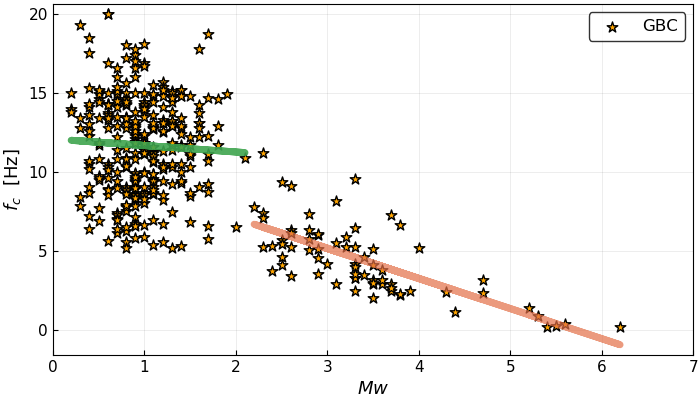

In [151]:
scatter((DataGolfo[:Mw]),(DataGolfo[:Fc_Hz]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xFGo,GolcorrF,linewidth=5,linealpha=0.7,lab="")
plot!(xFGo2,GolcorrF2,linewidth=5,linealpha=0.9,lab="")
#plot!(x,[GolcorrF GolcorrF],fillrange=[GolcorrF+err,GolcorrF-err],fillalpha=0.8,c=:orange,leg=false)
#PyPlot.savefig("MwvsFc-RegressGolfo.pdf",dpi=400)

In [96]:
#DataGolfo[:LogRa] = log10(DataGolfo[:Radio]);
DataGolfo[:LogRa]= log10.(collect(skipmissing(DataGolfo[:Radius_km])))
golfoMw = DataGolfo[(DataGolfo[:Mw]) .>=2.14,:]; #Mw >= 2.14
golfoMw2 = DataGolfo[(DataGolfo[:Mw]) .<2.14,:]; #Mw < 2.14

In [98]:
ReGolMwRad = fit(LinearModel,@formula(LogRa ~ Mw),golfoMw)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Mw

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  -1.68792  0.104006 -16.229   <1e-24
Mw           0.354017 0.0298242 11.8701   <1e-17


In [101]:
GolMwRad(x)=coef(ReGolMwRad)[2] * x + coef(ReGolMwRad)[1];
xRGo = golfoMw[:Mw];
GolcorrRad = GolMwRad(xRGo);
#σFGol = stderr(ReGolMwRad)[2];
#err = sqrt(sum((DataGolfo[:LogRa] - GolcorrRad).^2)/length(GolcorrF))

In [102]:
ReGolMwRad2 = fit(LinearModel,@formula(LogRa ~ Mw),golfoMw2)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Mw

Coefficients:
              Estimate Std.Error  t value Pr(>|t|)
(Intercept)    -1.1488 0.0228482 -50.2798   <1e-99
Mw           0.0107423 0.0219365   0.4897   0.6247


In [105]:
GolMwRad2(x)=coef(ReGolMwRad2)[2] * x + coef(ReGolMwRad2)[1];
xRGo2 = golfoMw2[:Mw];
GolcorrRad2 = GolMwRad2(xRGo2);
#σFGol = stderr(ReGolMwRad)[2];
#err = sqrt(sum((DataGolfo[:LogRa] - GolcorrRad).^2)/length(GolcorrF))

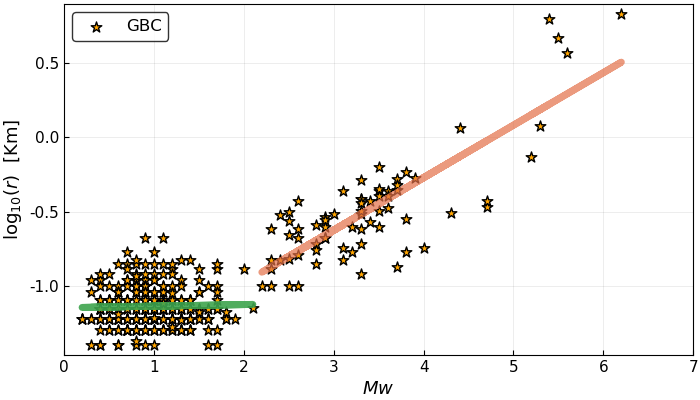

In [162]:
scatter((DataGolfo[:Mw]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRGo,GolcorrRad,linewidth=5,linealpha=0.7,lab="")
plot!(xRGo2,GolcorrRad2,linewidth=5,linealpha=0.9,lab="")
#PyPlot.savefig("MwvsR-RegressGolfo.pdf",dpi=400)

In [107]:
Golf2 = DataGolfo[(DataGolfo[:Displacement_m]) .> 0,:]; # Remove Despla <  0
#Golf2[:LogD] = log10(Golf2[:Desplamiento]);
Golf2[:LogD] = log10.(collect(skipmissing(Golf2[:Displacement_m])))
golfoMw3 = Golf2[(Golf2[:Mw]) .>=2.14,:]; #Mw >= 2.14
golfoMw4 = Golf2[(Golf2[:Mw]) .<2.14,:]; #Mw < 2.14
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

In [108]:
ReGolMwD = fit(LinearModel,@formula(LogD ~ Mw),golfoMw3)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.62312  0.211837 -21.8239   <1e-31
Mw           0.801117 0.0607449  13.1882   <1e-19


In [109]:
GolMwD(x)=coef(ReGolMwD)[2] * x + coef(ReGolMwD)[1];
xDGo = golfoMw3[:Mw];
GolcorrD = GolMwD(xDGo);

In [110]:
ReGolMwD2 = fit(LinearModel,@formula(LogD ~ Mw),golfoMw4)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   -5.4287 0.0498392 -108.924   <1e-99
Mw            1.48163 0.0478506  30.9637   <1e-93


In [111]:
GolMwD2(x)=coef(ReGolMwD2)[2] * x + coef(ReGolMwD2)[1];
xDGo2 = golfoMw4[:Mw];
GolcorrD2 = GolMwD2(xDGo2);

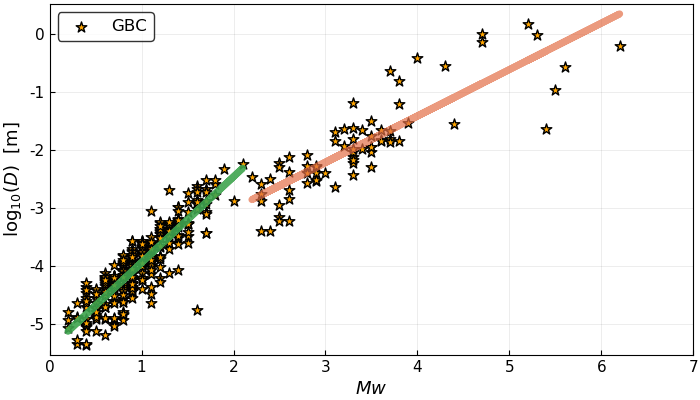

In [165]:
scatter((Golf2[:Mw]),(Golf2[:LogD]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDGo,GolcorrD,linewidth=5,linealpha=0.7,lab="")
plot!(xDGo2,GolcorrD2,linewidth=5,linealpha=0.9,lab="")
#PyPlot.savefig("MwvsDRegressGolfo.pdf",dpi=400)

# 3. TMVB Catalog

In [118]:
ReTMVBMwFc = fit(LinearModel,@formula(Fc_Hz ~ Mw),TMVB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Fc_Hz ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)   14.3905   1.52304  9.44853   <1e-14
Mw           -3.14853  0.461065 -6.82883    <1e-9


In [119]:
TMVBMwfc(x)=coef(ReTMVBMwFc)[2] * x + coef(ReTMVBMwFc)[1];
xFtm = TMVB[:Mw];
TMVBcorrF = TMVBMwfc(xFtm);

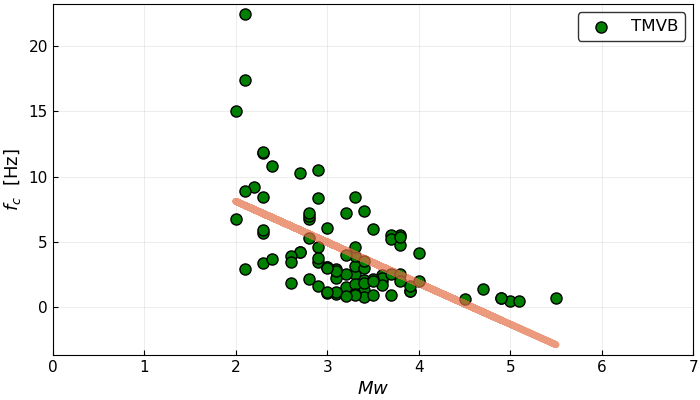

In [120]:
scatter((TMVB[:Mw]),(TMVB[:Fc_Hz]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xFtm,TMVBcorrF,linewidth=5,linealpha=0.7,lab="")

In [121]:
#TMVB[:LogRa] = log10(TMVB[:Radio]);
TMVB[:LogRa] = log10.(collect(skipmissing(TMVB[:Radius_km])))
ReTMVBMwRad = fit(LinearModel,@formula(LogRa ~ Mw),TMVB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogRa ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -1.66291  0.127588 -13.0334   <1e-21
Mw           0.406094 0.0386244  10.5139   <1e-16


In [122]:
TMVBMwRad(x)=coef(ReTMVBMwRad)[2] * x + coef(ReTMVBMwRad)[1];
xRtm = TMVB[:Mw];
TMVBcorrRad = TMVBMwRad(xRtm);

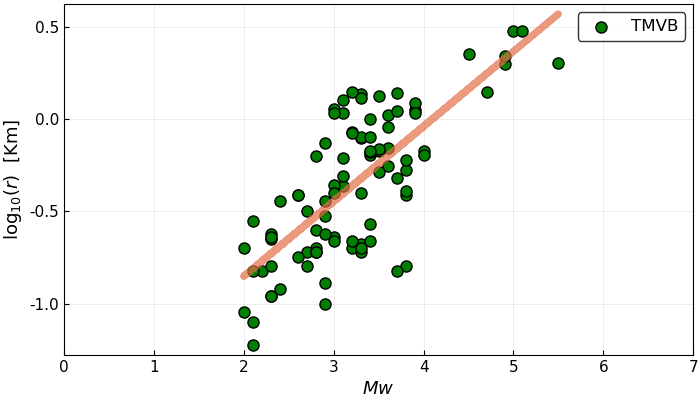

In [123]:
scatter((TMVB[:Mw]),(TMVB[:LogRa]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [Km]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xRtm,TMVBcorrRad,linewidth=5,linealpha=0.7,lab="")

In [124]:
TMVB2 = TMVB[(TMVB[:Displacement_m]) .> 0,:]; # Remove Despla <  0
#TMVB2[:LogD] = log10(TMVB2[:Desplamiento]);
TMVB2[:LogD] = log10.(collect(skipmissing(TMVB2[:Displacement_m])))
ReTMVBMwD = fit(LinearModel,@formula(LogD ~ Mw),TMVB2)
#Repre = glm(@formula(SUB[:LogD]~SUB[:Magnitud]),SUB)

StatsModels.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: LogD ~ 1 + Mw

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -4.51779  0.270541 -16.6991   <1e-28
Mw           0.663164 0.0818999  8.09726   <1e-11


In [125]:
TMVBMwD(x)=coef(ReTMVBMwD)[2] * x + coef(ReTMVBMwD)[1];
xDtm = TMVB2[:Mw];
TMVBcorrD = TMVBMwD(xDtm);

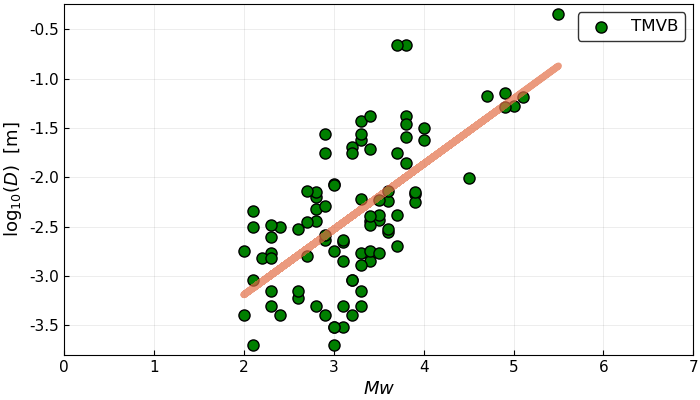

In [126]:
scatter((TMVB2[:Mw]),(TMVB2[:LogD]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",xlims=(0,7),xticks=(0:1:7),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
plot!(xDtm,TMVBcorrD,linewidth=5,linealpha=0.7,lab="")

# All subplot

In [52]:
# MW vs FC
#PyPlot.subplot(1,3,1)
su=scatter((SUB[:Mw]),(SUB[:Fc_Hz]),m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$f_{c}$  [Hz]",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xMsf,corrMsf,linewidth=5,linealpha=0.7,lab="")

#PyPlot.subplot(1,3,2)
gol=scatter((DataGolfo[:Mw]),(DataGolfo[:Fc_Hz]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,yticks=(0:5:30,[]),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xFGo,GolcorrF,linewidth=5,linealpha=0.7,lab="")

#PyPlot.subplot(1,3,3)
tm=scatter((TMVB[:Mw]),(TMVB[:Fc_Hz]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,yticks=(0:5:30,[]),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xFtm,TMVBcorrF,linewidth=5,linealpha=0.7,lab="")

plot(su,gol,tm,layout=(1,3),size=(900,700),ylims=(-0.3,30),grid=:true)
#PyPlot.savefig("MwvsFcT-Regress2Ver.pdf",dpi=400)

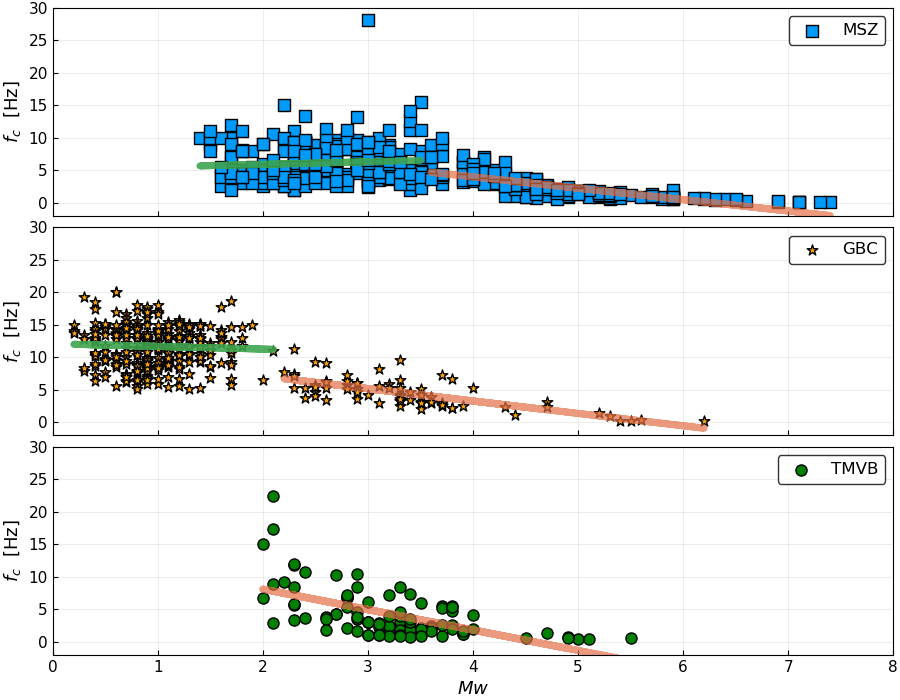

In [116]:
# MW vs FC
#PyPlot.subplot(1,3,1)
su=scatter((SUB[:Mw]),(SUB[:Fc_Hz]),m=(8,:rect),lab=sub,
 ylabel=L"$f_{c}$  [Hz]",xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:True,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xMsf,corrMsf,linewidth=5,linealpha=0.7,lab="")
su=plot!(xMsf1,corrMsf1,linewidth=5,linealpha=0.9,lab="")

#PyPlot.subplot(1,3,2)
gol=scatter((DataGolfo[:Mw]),(DataGolfo[:Fc_Hz]),m=(8,:star5,:orange),lab=golf,
 ylabel=L"$f_{c}$  [Hz]",xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:True,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xFGo,GolcorrF,linewidth=5,linealpha=0.7,lab="")
gol=plot!(xFGo2,GolcorrF2,linewidth=5,linealpha=0.9,lab="")

#PyPlot.subplot(1,3,3)
tm=scatter((TMVB[:Mw]),(TMVB[:Fc_Hz]),m=(8,:circle,:green),lab=TM,
 ylabel=L"$f_{c}$  [Hz]", xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,yticks=(0:5:30),
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xFtm,TMVBcorrF,linewidth=5,linealpha=0.7,lab="")

plot(su,gol,tm,layout=(3,1),size=(900,700),ylims=(-2,30),grid=:true)
#PyPlot.savefig("MwvsFcT-Regress2Hor.pdf",dpi=400)

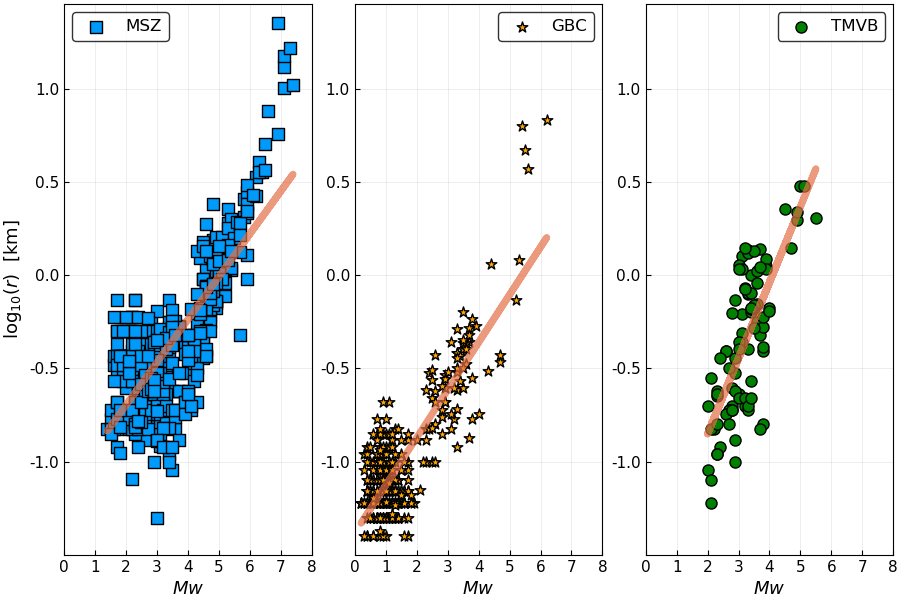

In [105]:
su=scatter((SUB[:Mw]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xRsub,rcorrRsub,linewidth=5,linealpha=0.7,lab="")

gol=scatter((DataGolfo[:Mw]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xRGo,GolcorrRad,linewidth=5,linealpha=0.7,lab="")

tm=scatter((TMVB[:Mw]),(TMVB[:LogRa]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xRtm,TMVBcorrRad,linewidth=5,linealpha=0.7,lab="")

plot(su,gol,tm,layout=(1,3),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,600))

#PyPlot.savefig("MWvsR-T-Regress.pdf",dpi=400)

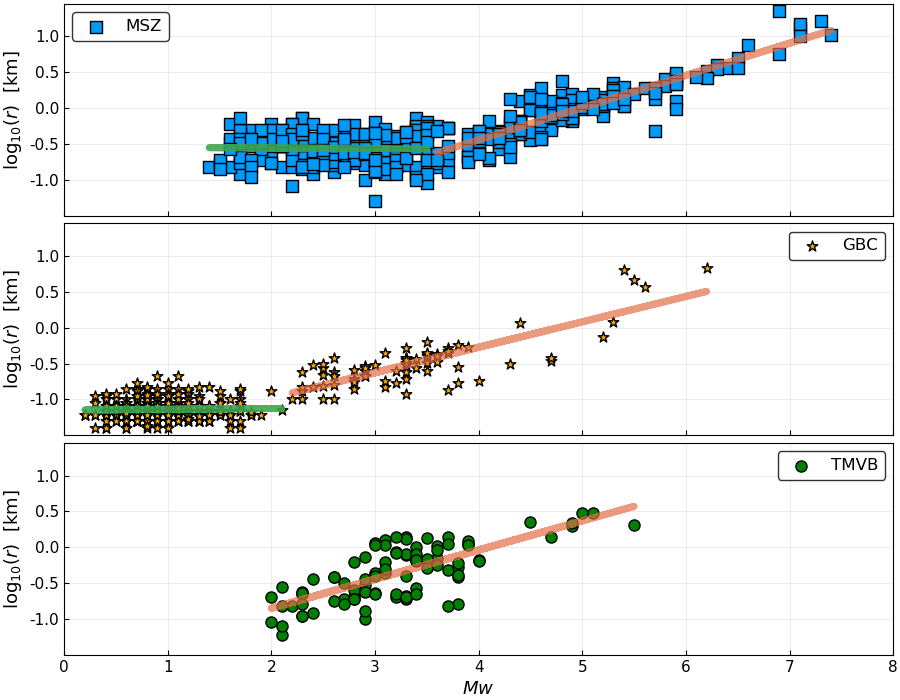

In [131]:
su=scatter((SUB[:Mw]),(SUB[:LogRa]),lab="SUB",m=(8,:rect),lab=sub,
ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
su=plot!(xRsub,rcorrRsub,linewidth=5,linealpha=0.7,lab="")
su=plot!(xRsub3,rcorrRsub3,linewidth=5,linealpha=0.9,lab="")

gol=scatter((DataGolfo[:Mw]),(DataGolfo[:LogRa]),m=(8,:star5,:orange),lab=golf,
ylabel=L"$\log_{10} (r)$  [km]",xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
gol=plot!(xRGo,GolcorrRad,linewidth=5,linealpha=0.7,lab="")
gol=plot!(xRGo2,GolcorrRad2,linewidth=5,linealpha=0.9,lab="")

tm=scatter((TMVB[:Mw]),(TMVB[:LogRa]),m=(8,:circle,:green),lab=TM,
ylabel=L"$\log_{10} (r)$  [km]", xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tm=plot!(xRtm,TMVBcorrRad,linewidth=5,linealpha=0.7,lab="")
plot(su,gol,tm,layout=(3,1),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,700))
#PyPlot.savefig("MWvsR-T-RegressHor.pdf",dpi=400)

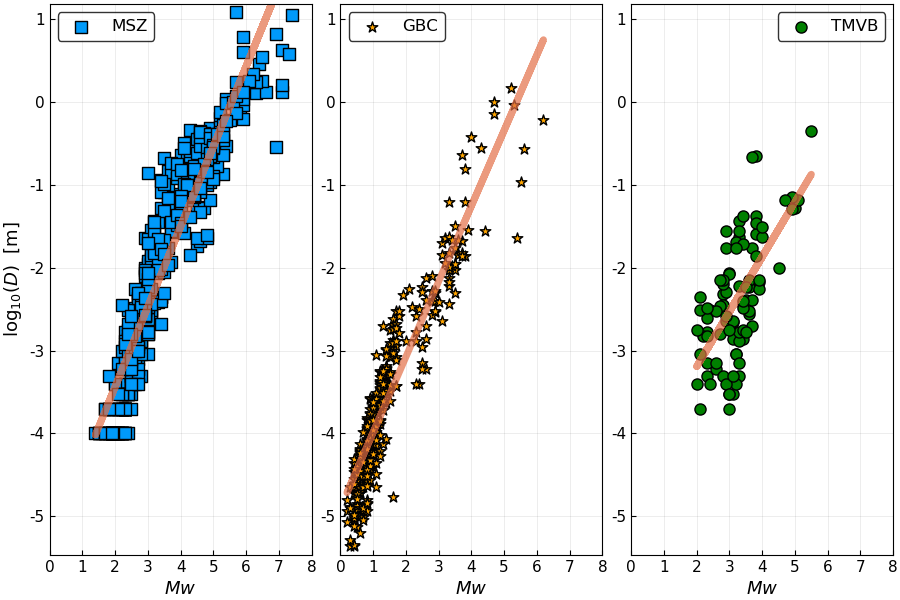

In [113]:
suD=scatter((SUB2[:Mw]),(SUB2[:LogD]), m=(8,:rect),lab=sub,
    xlabel=L"$Mw$", ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
suD=plot!(xDsub,dcorrDsub,linewidth=5,linealpha=0.7,lab="")

golD=scatter((Golf2[:Mw]),(Golf2[:LogD]),m=(8,:star5,:orange),lab=golf,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
golD=plot!(xDGo,GolcorrD,linewidth=5,linealpha=0.7,lab="")

tmD=scatter((TMVB2[:Mw]),(TMVB2[:LogD]),m=(8,:circle,:green),lab=TM,
    xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tmD=plot!(xDtm,TMVBcorrD,linewidth=5,linealpha=0.7,lab="")

#plot(su,gol,tm,layout=(1,3),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,600))
plot(suD,golD,tmD,layout=(1,3),ylims=(minimum(Golf2[:LogD])-0.1,maximum(SUB2[:LogD]+0.1)),size=(900,600))

#PyPlot.savefig("MWvsD-T-RegressHor.pdf",dpi=400)

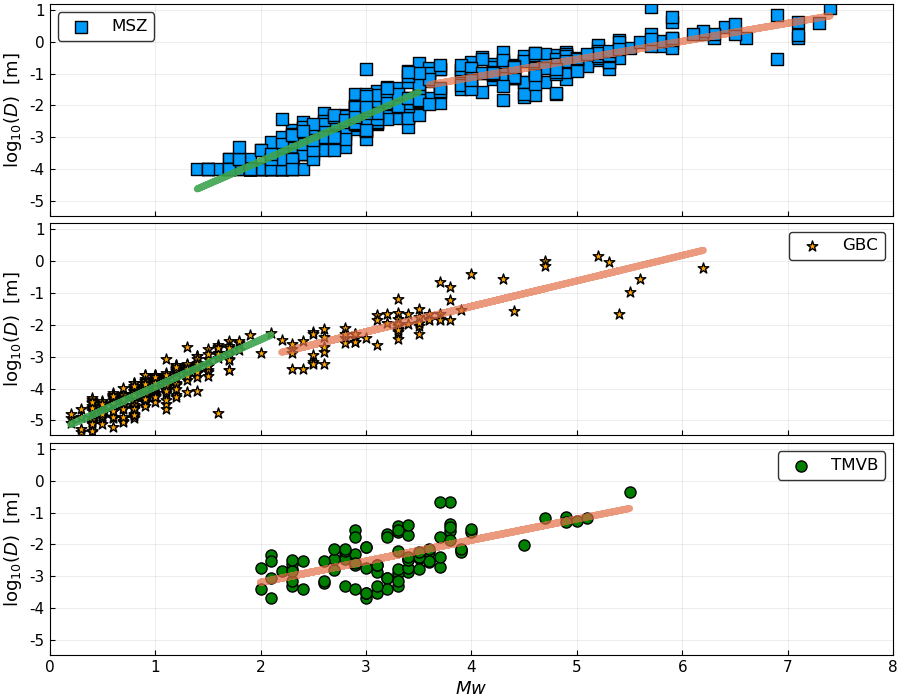

In [137]:
suD=scatter((SUB2[:Mw]),(SUB2[:LogD]), m=(8,:rect),lab=sub,
ylabel=L"$\log_{10} (D)$  [m]",ylims=(-4.5,3),xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:True,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
suD=plot!(xDsub,dcorrDsub,linewidth=5,linealpha=0.7,lab="")
suD=plot!(xDsub2,dcorrDsub2,linewidth=5,linealpha=0.9,lab="")

golD=scatter((Golf2[:Mw]),(Golf2[:LogD]),m=(8,:star5,:orange),lab=golf,
ylabel=L"$\log_{10} (D)$  [m]", xlims=(0,8),xticks=(0:1:8,[]),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
golD=plot!(xDGo,GolcorrD,linewidth=5,linealpha=0.7,lab="")
golD=plot!(xDGo2,GolcorrD2,linewidth=5,linealpha=0.9,lab="")

tmD=scatter((TMVB2[:Mw]),(TMVB2[:LogD]),m=(8,:circle,:green),lab=TM,
ylabel=L"$\log_{10} (D)$  [m]", xlabel=L"$Mw$",xlims=(0,8),xticks=(0:1:8),size=(700,400),box=:true,
legendfont=Plots.font("Helvetica",12),
xtickfont=Plots.font("Helvetica",11),
ytickfont=Plots.font("Helvetica",11),
guidefont=Plots.font("Helvetica",13))
tmD=plot!(xDtm,TMVBcorrD,linewidth=5,linealpha=0.7,lab="")

#plot(su,gol,tm,layout=(1,3),ylims=(minimum(DataGolfo[:LogRa])-0.1,maximum(SUB[:LogRa]+0.1)),size=(900,600))
plot(suD,golD,tmD,layout=(3,1),ylims=(minimum(Golf2[:LogD])-0.1,maximum(SUB2[:LogD]+0.1)),size=(900,700))

#PyPlot.savefig("MWvsD-T-RegressHor.pdf",dpi=400)